In [242]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Time Series Generation

In [243]:
#set seed equal to student number
np.random.seed(20121554)
#given equation
y_0=y_1=100;fia=0.6;theta=-0.4;d=0.025
#standard normal error e_t
e=np.random.standard_normal(2001)
e

array([ 0.92052648,  0.13674586,  0.22246692, ..., -0.60099339,
       -0.382828  , -0.16624275])

In [244]:
#generate delta y
t=2000
i=2
dys=[0]#delta y series
dy=0
while i <= 2000:
    dy=fia*(dy-d)+e[i]+theta*e[i-1]+d
    dys.append(dy)
    i += 1

In [245]:
#y
yts=[100,100]#time series of  y
j=1
yy=100
while j <= 1999:
    yy=yy+dys[j]
    yts.append(yy)
    j += 1


In [246]:
df_y=pd.DataFrame(data=yts)
df_y.columns=['Price y']
df_y['delta y']=df_y['Price y'].diff()
df_y.head()

,Price y,delta y
0,100.000000,NaN
1,100.000000,0.000000
2,100.177769,0.177769
3,99.914400,-0.263369
4,100.723690,0.809290


Text(0.5, 1.0, 'Time series of Price y ')

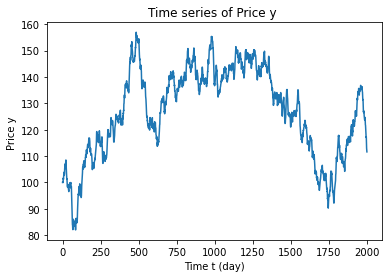

In [247]:
import matplotlib.pyplot as plt
t= df_y['Price y'].index
plt.plot(t, df_y['Price y'])
plt.xlabel('Time t (day)')
plt.ylabel('Price y ')
plt.title('Time series of Price y ')

Text(0.5, 1.0, 'Time series of delta y ')

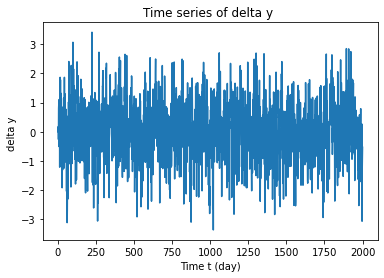

In [248]:
import matplotlib.pyplot as plt
t= df_y['delta y'].index
plt.plot(t, df_y['delta y'])
plt.xlabel('Time t (day)')
plt.ylabel('delta y ')
plt.title('Time series of delta y ')

In [249]:
from sklearn.model_selection import train_test_split
x= df_y.index
y=df_y['Price y']
test_size=int(2000*0.3)
X = df_y['Price y']
train, test = X[0:len(X)-test_size], X[len(X)-test_size:]

# Trading Strategies 

## AutoRegressive trading strategies

An autoregression model assume that we can use the data at time t to predict the next data point at time t+1. Therefore, before building a model, we firstly used a lag plot to check the randomness of the dataset, and calculate the correlation between the price at time t and the price at time t+1. 


### Quick Check for Autocorrelation

We can plot a lag plot for "Price y" to show the price y at time t against the price y at time (t+1).

Text(0.5, 1.0, 'Lag Plot for the Price y ')

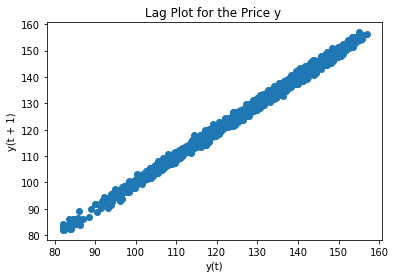

In [250]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df_y['Price y'])
plt.title('Lag Plot for the Price y ')

Then, we computed the Pearson correlation coefficient between y(t)and y(t+1).If the absolute value of the coefficient is greater and equal to 0.5, we can conclude that y(t)and y(t+1) has significantly high correlation. 


In [251]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot,autocorrelation_plot
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [252]:
df_corr = pd.concat([df_y['Price y'].shift(1),df_y['Price y']],axis=1)
df_corr.columns=['t','t+1']
df_corr.corr(method="pearson")

,t,t+1
t,1.00000,0.99817
t+1,0.99817,1.00000


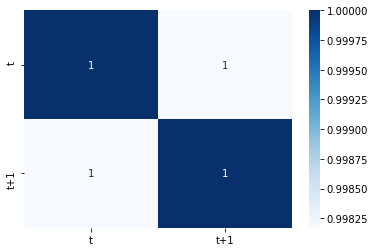

In [253]:
sns.heatmap(df_corr.corr(method="pearson"),cmap="Blues",annot=True)

It shows a strong positive correlation (0.99817) between the price y  and its lag=1 value. Thus, we can conclude that the price y  and its lag=1 value are correlated with each other. 

### AutoRegressive Model

In [254]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
series = df_y['Price y']
# split dataset
X = series.values
train, test = X[1:len(X)-600], X[len(X)-600:]
# train autoregression
for i in range(20):
    window = i 
    model = AutoReg(train, lags=i)
    model_fit = model.fit()
    coef = model_fit.params
    print("AR", i)
    print("AIC=",model_fit.aic)
    print("BIC=",model_fit.bic)

AR 0
AIC= 5.648623731698218
BIC= 5.656115485291937
AR 1
AIC= 0.04458574561313063
BIC= 0.05582987636652337
AR 2
AIC= -0.005296076452331747
BIC= 0.00970477597340146
AR 3
AIC= -0.016069292576624674
BIC= 0.002692634263951426
AR 4
AIC= -0.016149337779633524
BIC= 0.006378024469602797
AR 5
AIC= -0.01959149665229644
BIC= 0.006705670272282957
AR 6
AIC= -0.018008903864699423
BIC= 0.012062445296393661
AR 7
AIC= -0.018109014722014295
BIC= 0.015740902552944972
AR 8
AIC= -0.016421240786543338
BIC= 0.021211638817582847
AR 9
AIC= -0.014254766833943812
BIC= 0.02716547767443712
AR 10
AIC= -0.013187870968865797
BIC= 0.0320241494005564
AR 11
AIC= -0.013199269251816206
BIC= 0.03580894633911718
AR 12
AIC= -0.012386757754855884
BIC= 0.04042208084380009
AR 13
AIC= -0.010839004042573736
BIC= 0.045774893797889474
AR 14
AIC= -0.010929973702208946
BIC= 0.0494934280842251
AR 15
AIC= -0.008978932319231848
BIC= 0.05525842660969557
AR 16
AIC= -0.008473114024772785
BIC= 0.059582663757884055
AR 17
AIC= -0.0077614224231

As AR 5 has the lowest AIC, and AR 3 has the lowest BIC,  I saved these two models as candidates, and then compute their Root Mean Squared Errors to see which one is better. 

Test RMSE: 3.608


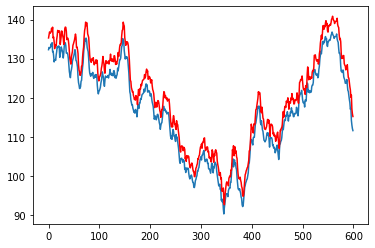

In [255]:
#AR 3
window = 3
model = AutoReg(train, lags=3)
model_fit = model.fit()

history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
preds = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    preds.append(yhat)
    history.append(obs)
    
rmse = sqrt(mean_squared_error(test, preds))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(preds, color='red')
pyplot.show()

Test RMSE: 1.655


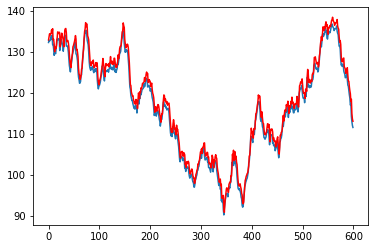

In [256]:
#AR 5
window = 5
model = AutoReg(train, lags=5)
model_fit = model.fit()

history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
preds = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    preds.append(yhat)
    history.append(obs)
    
rmse = sqrt(mean_squared_error(test, preds))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(preds, color='red')
pyplot.show()

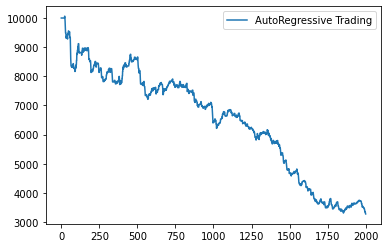

In [263]:
#TRADING: AR 

S=df_y['Price y']
t = df_y['Price y'].index
time_window = 20
cumsum = [0]

AU_pred = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 10000

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ar_pred[i] = x
    if i>=time_window:
        X = S[0:i]
        train = X
        # train autoregression
        model = AutoReg(train, lags=5)
        model_fit = model.fit()
        preds = model_fit.predict(start=len(train), end=len(train), dynamic=False)
        preds= np.array(preds)
        AU_pred[i] = preds[0]
    
    if AU_pred[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if AU_pred[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if AU_pred[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

AU_strategy = [a*b for a,b in zip(w,S)]+ cash
AU_strategy

import matplotlib.pyplot as plt
#plt.plot(t, tf_strategy)
#plt.plot(t, cash[0]*S/S[0])
plt.plot(t, AU_strategy,label='AutoRegressive Trading')
plt.legend()
plt.show()

In [269]:
strategy_AU=pd.DataFrame(data=AU_strategy)
strategy_AU.columns=['AutoRegressive']
strategy_AU['Log_Return']=np.log(strategy_AU['AutoRegressive'])-np.log(strategy_AU['AutoRegressive'].shift(1))
strategy_AU.head(5)

,AutoRegressive,Log_Return
0,10000.0,NaN
1,10000.0,0.0
2,10000.0,0.0
3,10000.0,0.0
4,10000.0,0.0


## Mean Reversion

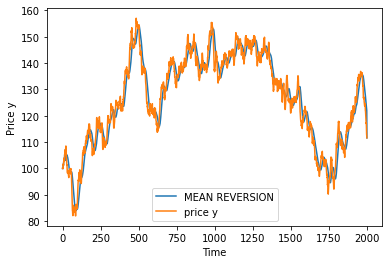

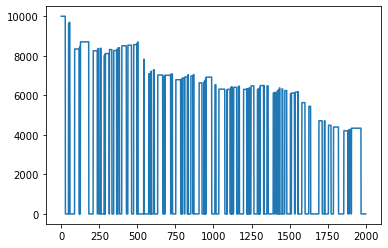

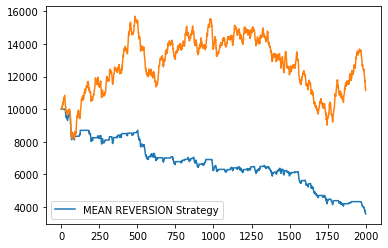

In [17]:
#TRADING: MEAN REVERSION 
    
time_window = 20
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))
cash[0] = 10000

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] < x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]

mr_strategy = [a*b for a,b in zip(w,S)]+ cash


plt.plot(t, ma,label='MEAN REVERSION')
plt.xlabel("Time")
plt.ylabel("Price y")
plt.legend()
plt.plot(t, S, label='price y')
plt.legend()
plt.show()

plt.plot(t, cash)
plt.show()

plt.plot(t, mr_strategy,label='MEAN REVERSION Strategy')
plt.plot(t, cash[0]*S/S[0])
plt.legend()
plt.show()

In [18]:
strategy_mr=pd.DataFrame(data=mr_strategy)
strategy_mr.columns=['MEAN REVERSION']
strategy_mr['Log_Return']=np.log(strategy_mr['MEAN REVERSION'])-np.log(strategy_mr['MEAN REVERSION'].shift(1))
strategy_mr.head(5)

,MEAN REVERSION,Log_Return
0,10000.0,NaN
1,10000.0,0.0
2,10000.0,0.0
3,10000.0,0.0
4,10000.0,0.0


## Trend Following

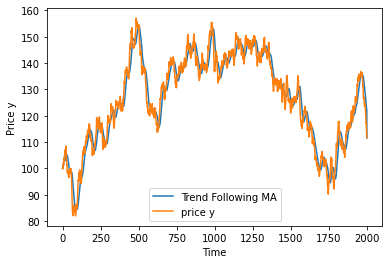

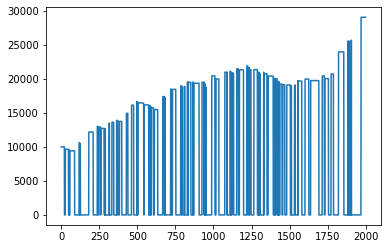

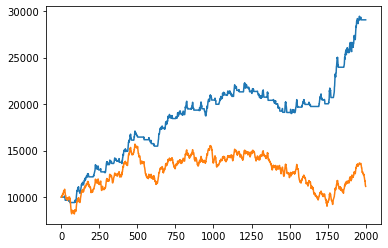

In [19]:
time_window = 20
cumsum = [0]
ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))
cash[0] = 10000

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_ave = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_ave
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x:         
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

ma[i+1] = S[len(S)-1]
        
plt.plot(t, ma,label='Trend Following MA')
plt.xlabel("Time")
plt.ylabel("Price y")
plt.legend()
plt.plot(t, S, label='price y')
plt.legend()
plt.show()

tf_strategy = [a*b for a,b in zip(w,S)]+ cash

plt.plot(t, cash)
plt.show()

plt.plot(t, tf_strategy)
plt.plot(t, cash[0]*S/S[0])
plt.show()

In [213]:
strategy_tf=pd.DataFrame(data=tf_strategy)
strategy_tf.columns=['Trend Following']
strategy_tf['Log_Return']=np.log(strategy_tf['Trend Following'])-np.log(strategy_tf['Trend Following'].shift(1))

In [209]:
np.exp(strategy_tf['Log_Return'].mean())

1.00053338744451

Finally, plot all strategy together.

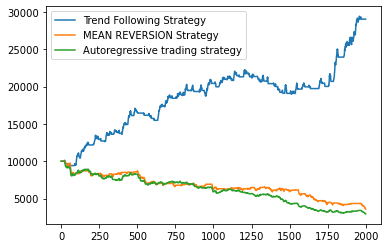

In [21]:
plt.plot(t, tf_strategy,label='Trend Following Strategy')
plt.plot(t, mr_strategy,label='MEAN REVERSION Strategy')
plt.plot(t, ar_strategy,label='Autoregressive trading strategy')
plt.legend()
plt.show()

# Performance Indicators


Instructions: Compute 3 representative performance indicators, Sharpe ratio and VaR, and Conditional Sharpe Ratio

## Sharpe Ratio

The Sharpe ratio indicate the performance of our strategy comparing to the performance of a risk-free investment. Its equation shows below

In [264]:
#AUTOREG
AU_r = strategy_AU['Log_Return']

AU_sr = AU_r.mean()/AU_r.std() * np.sqrt(252)
AU_sr

-1.5133967367869807

In [265]:
#Mean Reversion
MR_r = strategy_mr['Log_Return']

MR_sr = MR_r.mean()/MR_r.std() * np.sqrt(252)
MR_sr

-1.3931782017345757

In [266]:
#Trend Following
TF_r = strategy_tf['Log_Return']

TF_sr = TF_r.mean()/TF_r.std() * np.sqrt(252)
TF_sr

1.455327533023809

## Value-at-Risk (VaR)

-0.011682568256207126


/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


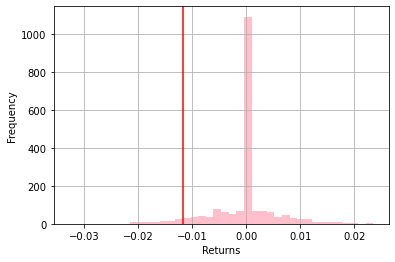

In [267]:
import numpy as np
import pandas as pd
import matplotlib as plt
strategy_AU.sort_values('Log_Return',inplace = True, ascending = True)

VaR_95_AU = strategy_AU['Log_Return'].quantile(0.05)
print(VaR_95_AU)

plt.pyplot.hist(strategy_AU.Log_Return, bins = 40,color='pink')
plt.pyplot.axvline(x=VaR_95_AU,color='r')

plt.pyplot.xlabel('Returns')
plt.pyplot.ylabel('Frequency')
plt.pyplot.grid(True)
plt.pyplot.show()





-0.011683882555839542


/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


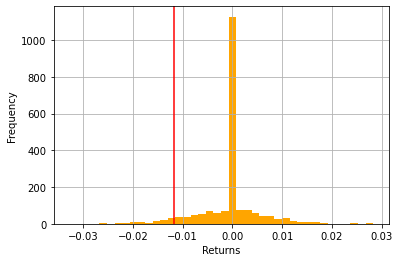

In [53]:
strategy_mr.sort_values('Log_Return',inplace = True, ascending = True)

VaR_95_mr = strategy_mr['Log_Return'].quantile(0.05)
print(VaR_95_mr)

plt.pyplot.hist(strategy_mr.Log_Return, bins = 40,color='orange')
plt.pyplot.axvline(x=VaR_95_mr,color='r')

plt.pyplot.xlabel('Returns')
plt.pyplot.ylabel('Frequency')
plt.pyplot.grid(True)
plt.pyplot.show()

-0.009300627618990198


/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xueerzheng/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


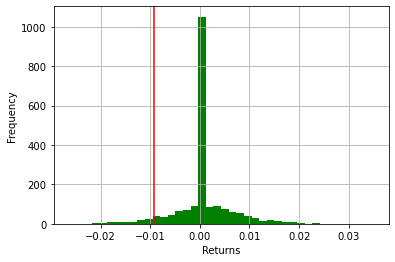

In [54]:
strategy_tf.sort_values('Log_Return',inplace = True, ascending = True)

VaR_95_tf = strategy_tf['Log_Return'].quantile(0.05)
print(VaR_95_tf)

plt.pyplot.hist(strategy_tf.Log_Return, bins = 40,color='green')
plt.pyplot.axvline(x=VaR_95_tf,color='r')

plt.pyplot.xlabel('Returns')
plt.pyplot.ylabel('Frequency')
plt.pyplot.grid(True)
plt.pyplot.show()

With 95% confidence, we expect that our worst daily loss will not exceed 4%.

## Maximum Drawdown

-1.1205850059426652

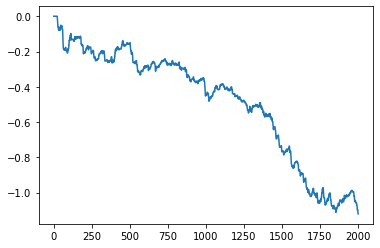

In [268]:
strategy_AU.sort_index(axis=0,inplace = True, ascending = True)
strategy_AU["total_return"] = strategy_AU["Log_Return"].cumsum()
strategy_AU["drawdown"] = strategy_AU["total_return"] - strategy_AU["total_return"].cummax()
maxdd_AU = strategy_AU["drawdown"].min()
strategy_AU["drawdown"].plot()
maxdd_AU


-1.0262188895282165

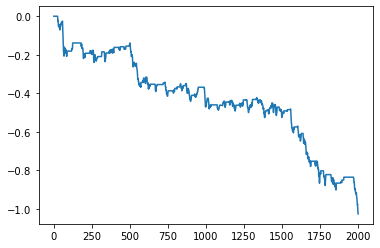

In [64]:
strategy_mr.sort_index(axis=0,inplace = True, ascending = True)
strategy_mr["total_return"] = strategy_mr["Log_Return"].cumsum()
strategy_mr["drawdown"] = strategy_mr["total_return"] - strategy_mr["total_return"].cummax()
maxdd_mr = strategy_mr["drawdown"].min()
strategy_mr["drawdown"].plot()
maxdd_mr

-0.15936275976387826

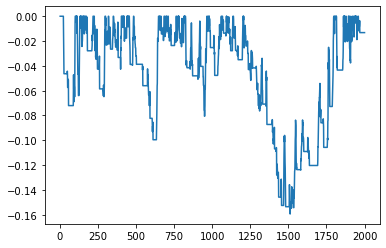

In [66]:
strategy_tf.sort_index(axis=0,inplace = True, ascending = True)
strategy_tf["total_return"] = strategy_tf["Log_Return"].cumsum()
strategy_tf["drawdown"] = strategy_tf["total_return"] - strategy_tf["total_return"].cummax()
maxdd_tf = strategy_tf["drawdown"].min()
strategy_tf["drawdown"].plot()
maxdd_tf

In [110]:
strategy_AU=pd.DataFrame(data=AU_strategy)
strategy_AU.columns=['AutoRegressive']
strategy_AU['Log_Return']=np.log(strategy_AU['AutoRegressive'])-np.log(strategy_AU['AutoRegressive'].shift(1))
strategy_AU.head(5)

,Trend Following,Log_Return
0,10000.0,NaN
1,10000.0,0.0
2,10000.0,0.0
3,10000.0,0.0
4,10000.0,0.0


# Statistical Tests [20 Points]

To explore whether our trading strategies are profitable, I performed a one sample T-test to see whether the log returns are significantly greater than 0. To be specific, the null hypothesis states that the expected log return of the strategy is less than or equal to 0, while the alternative hypothesis states that the expected log return of the strategy is greater than zero. In this case, we computed our p-values at 95% Confident Interval in right-tailed tests. That is, if p-values smaller than 0.05, we can reject our null hypothesis. 

In [270]:
from scipy.stats import ttest_1samp
import numpy as np
#N Number of Strategy
N=3
#Sharpe Ratio Statistics
# AR Strategy


AU_r = strategy_AU['Log_Return']
AU_r=AU_r.dropna()
T=len(AU_r)
AU_sr = AU_r.mean()/AU_r.std() #do not annulaized, just calculate the mean return through all 2000 days

T_STAT_AU=AU_sr*np.sqrt(T) #AR_sr*np.sqrt(T)
df=T-1
P_val_AU=stats.t.sf(T_STAT_AU, T-1)

print('t-statistics',T_STAT_AU)
print('p-values',P_val_AU)

if P_val_AU < 0.05:  
     # significant level =0.05
    print(" we are rejecting null hypothesis which suggests the expected log return of AutoRegressive strategy is 0.")
else:
    
    print("we cannot reject the null hypothesis")

t-statistics -4.26351230395926
p-values 0.9999894695318358
we cannot reject the null hypothesis


In [271]:


MR_r = strategy_mr['Log_Return']
MR_r=MR_r.dropna()
T=len(MR_r)
MR_sr = MR_r.mean()/MR_r.std() #do not annulaized

T_STAT_mr=MR_sr*np.sqrt(T) #AR_sr*np.sqrt(T)
df=T-1
P_val_mr=stats.t.sf(T_STAT_mr, T-1)

print('t-statistics',T_STAT_mr)
print('p-values',P_val_mr)

if P_val_mr < 0.05:  
     # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis which suggests the expected log return of Mean Reversion strategy is  0.")
else:
    
    print("we cannot reject the null hypothesis")

t-statistics -3.9248349493033343
p-values 0.9999551368308074
we cannot reject the null hypothesis


In [272]:
TF_r = strategy_tf['Log_Return']
TF_r=TF_r.dropna()
T=len(TF_r)
TF_sr = TF_r.mean()/TF_r.std() #do not annulaized

T_STAT_tf=TF_sr*np.sqrt(T) #AR_sr*np.sqrt(T)
df=T-1
P_val_tf=stats.t.sf(T_STAT_tf, T-1)

print('t-statistics',T_STAT_tf)
print('p-values',P_val_tf)

if P_val_tf < 0.05:  
     # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis which suggests the expected log return of Trend Following strategy is less than or equal to 0.")
else:
    
    print("we cannot reject the null hypothesis")

t-statistics 4.099920855195426
p-values 2.1491636686711045e-05
 we are rejecting null hypothesis which suggests the expected log return of Trend Following strategy is less than or equal to 0.


In [273]:
AU_r = strategy_AU['Log_Return']
AU_r=AU_r.dropna()
T=len(AU_r)
AU_sr = AU_r.mean()/AU_r.std() #do not annulaized, just calculate the mean return through all 2000 days

T_STAT_AU=AU_sr*np.sqrt(T) #AR_sr*np.sqrt(T)
df=T-1
P_val_AU=stats.t.sf(T_STAT_AU, T-1)

print('t-statistics',T_STAT_AU)
print('p-values',P_val_AU)

if P_val_AU < 0.05:  
     # significant level =0.05
    print(" we are rejecting null hypothesis which suggests the expected log return of AutoRegressive strategy is 0.")
else:
    
    print("we cannot reject the null hypothesis")

t-statistics -4.26351230395926
p-values 0.9999894695318358
we cannot reject the null hypothesis


As the results of hypothesis testing show above, only the trend following strategy has a  p-value are smaller than 0.05, so we can reject the null hypothesis and conclude that at 95% Confidence interval, the trend following strategy has the expected log returns greater then 0. Moreover, as Autoregressive strategy and Mean Reversion Strategy both have p-values greater than 0.05, we cannot reject the null hypothesis.  

## Sharpe Ratio Adjustment under Multiple Tests

In this case, we have 3 strategy in total: Autoregressive Trading Strategy, Mean Reversion Trading Strategy, and Trend Following Trading Strategy. Based on T-test in the previous section, we just rejected one hypothesis which is for the trend following strategy.  

Family Wise Error Rate is the probability of making at least one false rejection. In other words, if a strategy is not profitable, but we still reject the null hypothesis. To control the Family Wise Error Rate, we used Bonferroni correction to make equivalent adjustments to each p-value. The Bonferroni correction suggests that the adjusted p-value for each hypothesis test should be multiplied by the total number of tests. The result of a hypothesis test  is significant only if its adjusted p-value is smaller than the significant level alpha.   

In [203]:
M=3
P_Vals = [P_val_tf, P_val_mr,P_val_AU]
adjusted_P = [P_val_tf*M, P_val_mr*M,P_val_AU*M]
print("adjusted p value for trend following is",adjusted_P)
print("original p value is", P_Vals)


adjusted p value for trend following is [6.447491006013313e-05, 2.999865410492422, 2.999968408595507]
original p value is [2.1491636686711045e-05, 0.9999551368308074, 0.9999894695318358]


The ordered p-value sequence is (0.00002149,0.99995513,0.999989). After applying the Bonferroni method, the adjusted p-value sequence is (0.000064749, 2.999865, 2.9999684). As the p value cannot be greater than 1, the valid adjusted p-value sequence is (0.000064749, 1, 1). Based on the Bonferroni method, only the first strategy(Trend Following) has significant p value.  